## Introduction
This notebook guides the user step-by-step through the general workflow with Nookiin, from loading libraries to visualizing the reciprocal space and diffraction pattern. It is ideal for understanding the full use of the tool before reviewing more specific examples.

## Loading Libraries and Packages
The first step in using the Nookiin tool to obtain the minimal cell of a stacked 2D system is to load all the required libraries this is done by importing nookiin and therefore all the functions from nookiin.system, for this it is necessary to have already installed nookiin using the command `pip install .` from the console.

In [1]:
import sys
import os

import nookiin
from nookiin.system import *

Load System
Nookiin Ready-to-work


## Creating 2D Lattices
Lattice objects model the crystals that make up the system we want to simulate. There are two ways to create lattices:

Manual creation: the primitive vectors (PVs) and the atomic basis (a list of Atom objects with their relative positions to the PVs) are defined explicitly.

Assisted creation: functions such as hexa3(), hexa6(), or rectLattice() are used to generate lattices with hexagonal (S3, S6) or rectangular symmetry. There are also predefined functions like graphene(), grapheneC3(), blackPhosphorene(), and h_BN().

Below is an example of how to manually build the lattice of beta-GeSe:

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
b-GeSe
1.0
        3.8261001110         0.0000000000         0.0000000000
        0.0000000000         5.8088998795         0.0000000000
        0.0000000000         0.0000000000         18.0892009735
	Ge	Se
	2	2
Direct
         0.7500000000         0.3677821160         0.1606478230
         0.2500000000         0.8684009310         0.0634941810
         0.7500000000         0.8466233610         0.1609372630
         0.2500000000         0.3469434380         0.0631845500
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


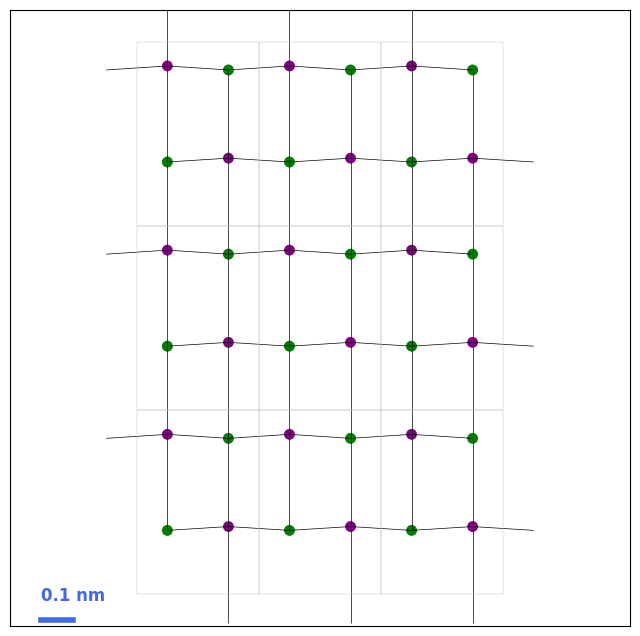

In [12]:
# Define the relative positions of the atoms in the atomic basis
pos1,pos2,pos3,pos4=(0.750000000,0.367782116),(0.250000000,0.868400931),(0.750000000,0.846623361),(0.250000000,0.346943438)

# Initialize the atoms
atomos=[Atom(pos1,posZ=0.160547823,color='purple',sig='Ge'),
        Atom(pos2,posZ=0.063394181,color='purple',sig='Ge'),
        Atom(pos3,posZ=0.160837263,color='green',sig='Se'),
        Atom(pos4,posZ=0.063084550,color='green',sig='Se')]

# Optional bonding for visualization
enlaces=[(pos1,pos3),(pos1,pos4),(pos1,sumaV(pos4,(1,0))),(pos1,sumaV(pos3,(0,-1))),
         (pos2,pos4),(pos2,pos3),(pos2,sumaV(pos3,(-1,0))),(pos2,sumaV(pos4,(0,1)))]

# Primitive vectors
vA, vB = (3.8261001110,0.0000000000), (0.0000000000,5.8088998795)

# Lattice initialization
bGeSe = Lattice(vA,vB,atms=atomos,enls=enlaces,detachment=18.0892009735,name='b-GeSe')

# Lattice initialization
print("+-"*40+"\n"+bGeSe.showData()+"\n"+"+-"*40)
bGeSe.showme(x=3,y=3)

It is also possible to import lattices from POSCAR files, in this case from the FePS3 and graphene files in a /VASP-FILES folder:

File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/FePS3.vasp' will be read
--Lattice created successfully
File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/graphene.vasp' will be read
--Lattice created successfully
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
FePS3
1.0
        5.9314999580         0.0000000000         0.0000000000
        -2.9657499790         5.1368296462         0.0000000000
        0.0000000000         0.0000000000         20.0000000000
	Fe	P	S
	2	2	6
Direct
         0.0000000000         0.0000000000         0.5001000000
         0.6666666870         0.3333333430         0.5001000000
         0.3333333430         0.6666666870         0.4451491070
         0.3333333430         0.6666666870         0.5550508930
         0.3333333430         0.3302960990         0.4212900530
         0.3333333430         0.0030372400         0.5789099770
         0.9969627860         0.6666666870         0.4212900530
         0.9969627860         0.3302960990         

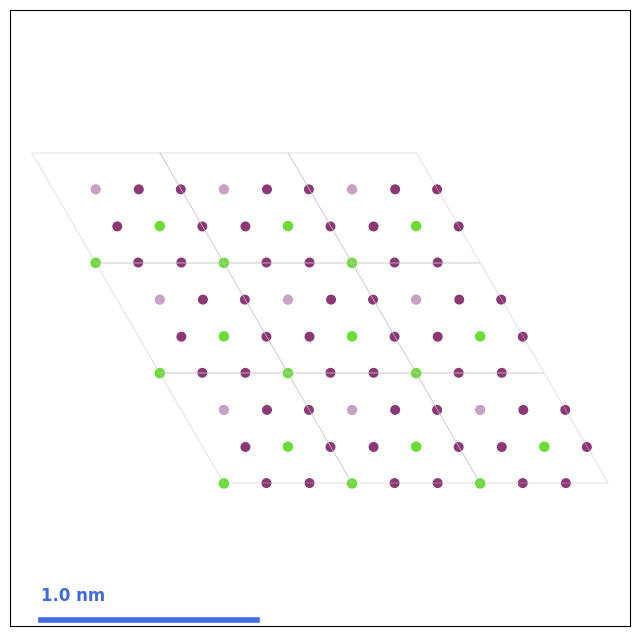

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Graphene
1.0
        2.4672000408         0.0000000000         0.0000000000
        -1.2336000204         2.1366579116         0.0000000000
        0.0000000000         0.0000000000         5.0000000000
	C
	2
Direct
         0.3333333430         0.6666666870         0.1001000000
         0.6666666870         0.3333333430         0.1001000000
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


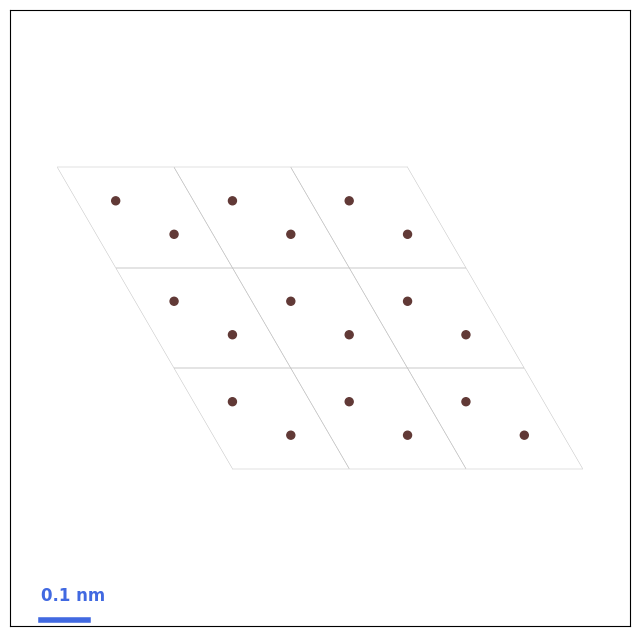

In [3]:
VASP_Files = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'VASP_Files'))
# Import from POSCAR-type files (in 'direct' format)
l1 = importLattice(VASP_Files+"/FePS3")
l2 = importLattice(VASP_Files+"/graphene")

# Assign names
l1.name="FePS3"
l2.name="Graphene"

# Visualization
print("+-"*40+"\n"+l1.showData()+"\n"+"+-"*40)
l1.showme(x=3,y=3)
print("+-"*40+"\n"+l2.showData()+"\n"+"+-"*40)
l2.showme(x=3,y=3)

## Solving for the Primitive Cell of a System
### System Initialization
The first step is to model the system by initializing a System object from a list of lattices.

If needed, we can apply a rotation to any of the layers using the mRot(θ) function.

For this example, we will model a system formed by stacking FePS3 and graphene with a relative rotation of $24.07^\circ$ between them, using the already imported lattices.

In [4]:
sr = System([l1, l2.mRot(24.07)])

### Primitive Cell (PC) Search
Once the system is modeled, we can search for a primitive cell (PC) using:

 - _searchLP(rangeOfSearch, epsilon): generates possible primitive vectors
 - _calculateTM(): generates the corresponding transformation matrices
 - ShowTMs(): displays tables with the suggested PCs

We will now search for possible PCs for the defined system within a search area equivalent to a radius of 10 times the FePS3 PC (rangeOfSearch=10) and with a maximum accepted strain of approximately 1% (epsilon=0.01).

Finally, we will examine the Transformation Matrices (TMs) corresponding to the possible calculated PCs.

In [5]:
sr._searchLP(rangeOfSearch=10, epsilon=0.01)
sr._calculateTM()
sr.ShowTMs()


***Option 1: T <- Matrix loMat[0]
Size of the primitive vectors: |a|=33.02519Å, |b|=33.02519Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   6   -1|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  310   |
|          FePS3          |  |   1    5|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  11    4|  |  | 0.99293  0.00403|  |   -0.505% // -0.2°    |  362   |
|    Graphene(24.07°)     |  |  -4   15|  |  |-0.00403  0.99696|  |   -0.505% // -0.2°    |        |
|                         |               |                      

[[9, 5], [-5, 14]]

### Highlighted Results
After analyzing the results, two stand out. The first is the one suggested by the program, as it produces the least distortion in the graphene layer. The second generates the smallest PC.

------------------------------------------------------------------------------------
##### <center>Resultado sugerido<center>
|$$\text{Lattice}$$|$$\text{T}$$|$$\text{M.Deformation}$$|$$\text{delta//theta}$$|$$\text{\#Atoms}$$|
|-------|-|-------------|------------|--------|
|FePS3|$$\begin{matrix}9&5\\-5&14\end{matrix}$$|$$\begin{matrix}1&0\\0&1\end{matrix}$$|$$\begin{matrix}0.000\%\text{  }//\text{  }0.0^o\\0.000\%\text{  }//\text{  }0.0°\end{matrix}$$|1510|
|Graphene(24.07°)|$$\begin{matrix}-9&24\\-24&33\end{matrix}$$|$$\begin{matrix}0.99988&-0.00003\\0.00003&0.99985\end{matrix}$$|$$\begin{matrix}-0.013\%\text{  }//\text{  }0.0^o\\-0.013\%\text{  }//\text{  }0.0^o\end{matrix}$$|1746|

---------------------------------------------------------------------------------
##### <center>Resultado más pequeño<center>
|$$\text{Lattice}$$|$$\text{T}$$|$$\text{M.Deformation}$$|$$\text{delta//theta}$$|$$\text{\#Atoms}$$|
|-------|-|-------------|------------|--------|
|FePS3|$$\begin{matrix}6&-1\\1&5\end{matrix}$$|$$\begin{matrix}1&0\\0&1\end{matrix}$$|$$\begin{matrix}0.000\%\text{  }//\text{  }0.0^o\\0.000\%\text{  }//\text{  }0.0°\end{matrix}$$|310|
|Graphene(24.07°)|$$\begin{matrix}11&-4\\4&15\end{matrix}$$|$$\begin{matrix}0.99293&0.00403\\-0.00403&0.99696\end{matrix}$$|$$\begin{matrix}-0.505\%\text{  }//\text{  }-0.2^o\\-0.505\%\text{  }//\text{  }-0.2^o\end{matrix}$$|362|

----------------------------------------------------------------------------------
With the first result, the number of atoms is $3256$, with a reduction in the length of the primitive vectors of the second layer by only $0.013\%$. The second, at the cost of a $0.505\%$ reduction and a correction of $-0.2^\circ$ in its PV angles, reduces this number to $672$.

We will now create systems using both results to display them, starting with the suggested result.
Let's begin with the one corresponding to the smallest PC:

Size of the primitive vectors: |a|=33.02519Å, |b|=33.02519Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   6   -1|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  310   |
|          FePS3          |  |   1    5|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  11    4|  |  | 0.99293  0.00403|  |   -0.505% // -0.2°    |  362   |
|    Graphene(24.07°)     |  |  -4   15|  |  |-0.00403  0.99696|  |   -0.505% // -0.2°    |        |
|                         |               |                       |                       |        |

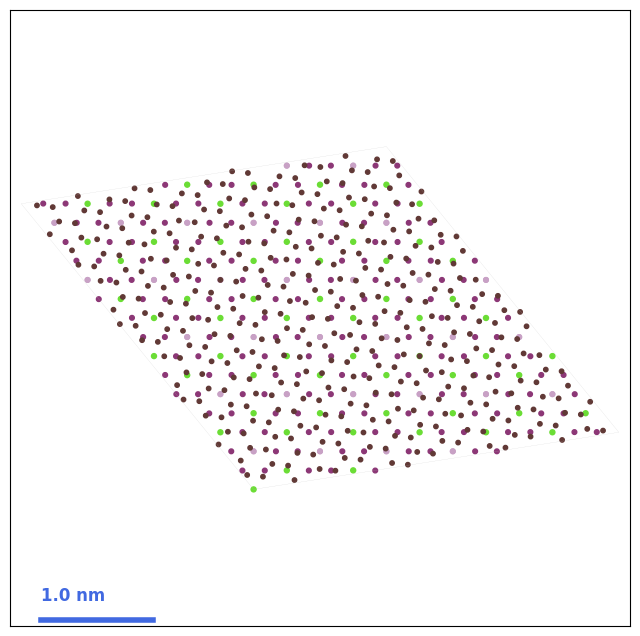

Image address: 'C:\SS\Nook’iin\Nook-iin\Examples\English\Images/FePS3-G24_07-A(3x3).png'


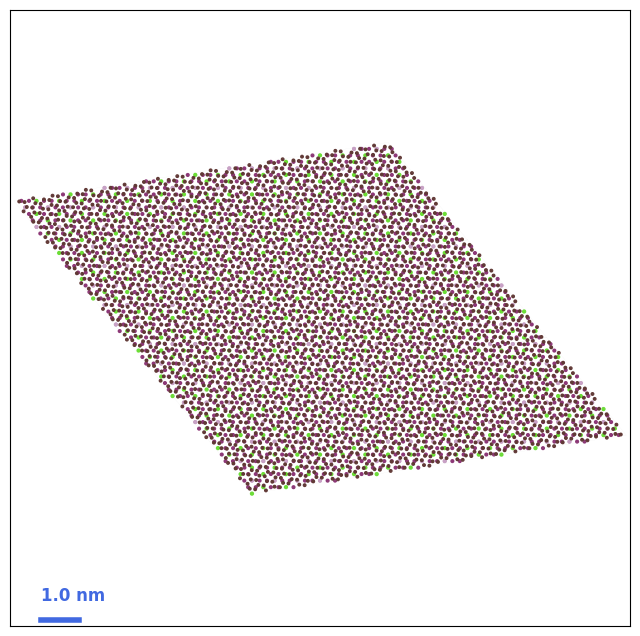

In [6]:
sMi = sr.optimize_system(sr.loMat[0],prnt=False)
sr.describeTM(sr.loMat[0])
sMi.primitive_lattice.showme(t=3)
sMi.primitive_lattice.showme(x=3,y=3,t=1, iName='FePS3-G24_07-A(3x3)')

Result with least distortion:

Size of the primitive vectors: |a|=72.88749Å, |b|=72.88749Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   9    5|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  1510  |
|          FePS3          |  |  -5   14|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |   9   24|  |  | 0.99988 -0.00003|  |   -0.013% // +0.0°    |  1746  |
|    Graphene(24.07°)     |  | -24   33|  |  | 0.00003  0.99985|  |   -0.013% // +0.0°    |        |
|                         |               |                       |                       |        |

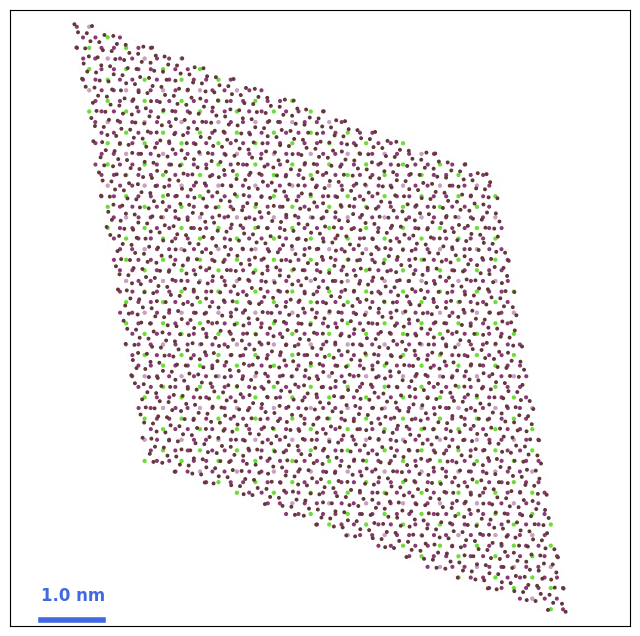

Image address: 'C:\SS\Nook’iin\Nook-iin\Examples\English\Images/FePS3-G24_07-B(3x3).png'


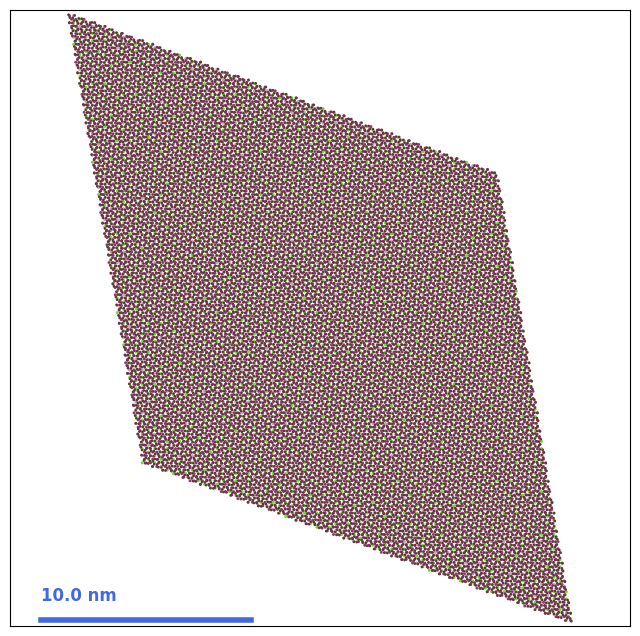

In [7]:
sOp = sr.optimize_system(sr.loMat[9],prnt=False)
sr.describeTM(sr.loMat[9])
sOp.primitive_lattice.showme(t=1)
sOp.primitive_lattice.showme(x=3,y=3,t=0.3, iName='FePS3-G24_07-B(3x3)')

### Exporting Result
To export the calculated PC to a POSCAR file, use the export_PC() function.

In [8]:
sMi.exportPC(PCname='FePS3-G24_07_m')
sOp.exportPC(PCname='FePS3-G24_07_o')

Lattice exported in:'C:\SS\Nook’iin\Nook-iin\Examples\English\VASP_Files/FePS3-G24_07_m.vasp'
Lattice exported in:'C:\SS\Nook’iin\Nook-iin\Examples\English\VASP_Files/FePS3-G24_07_o.vasp'


1

## Reciprocal Space and Diffraction Pattern
With a defined PC, we can generate representations of the reciprocal space and the diffraction pattern.

The representation in reciprocal space consists of a superposition of the FBZs of each lattice forming the system, displayed over a grid formed by the system’s FPZ corresponding to its PC.

To visualize the system’s reciprocal space representation, use the function showReciprocalSpace().

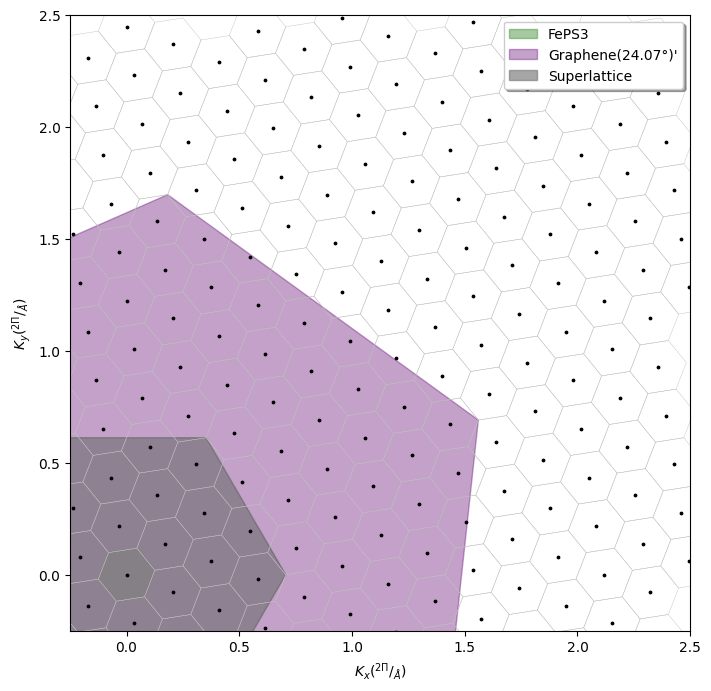

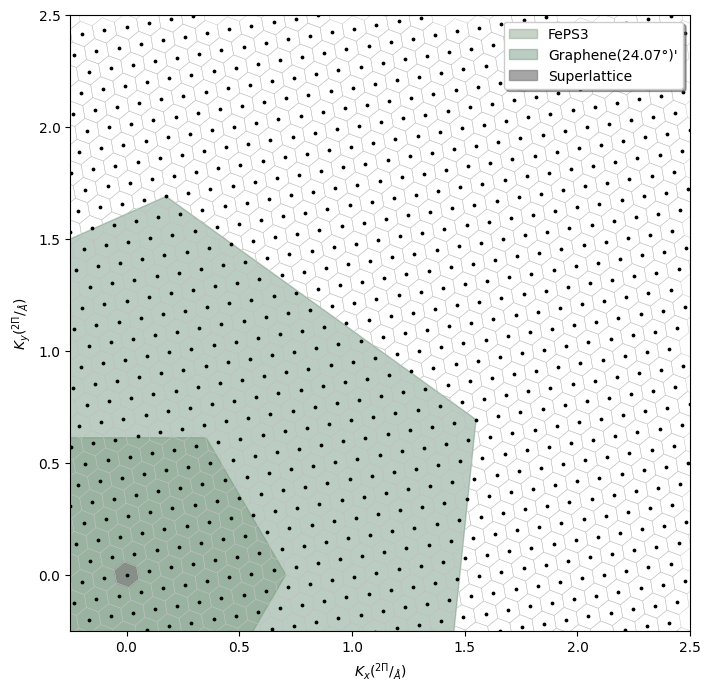

In [9]:
sMi.showReciprocalSpace(t=3,zoom=True)
sOp.showReciprocalSpace(t=3,zoom=True)

To visualize the diffraction pattern, use the function diffractionPattern().

Calculating diffraction pattern...

Dirección de imagen: '/images/DP-Suggested_System.png'


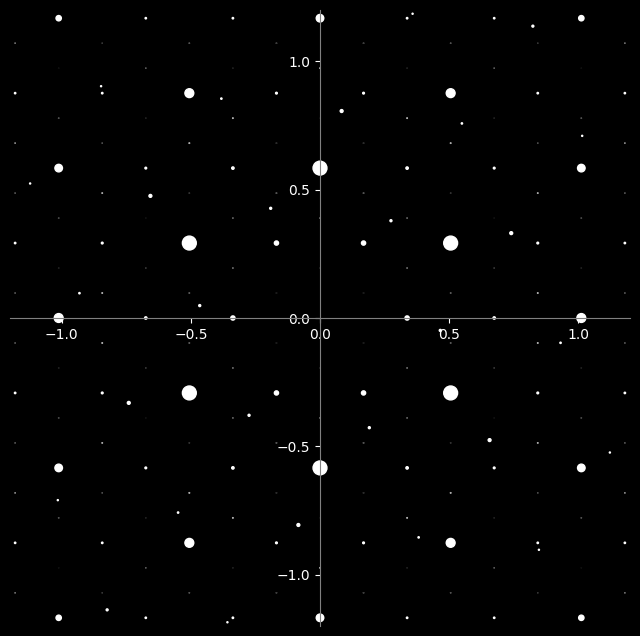

Diffraction pattern complete.
Calculating diffraction pattern...

Dirección de imagen: '/images/DP-Minimum_System.png'


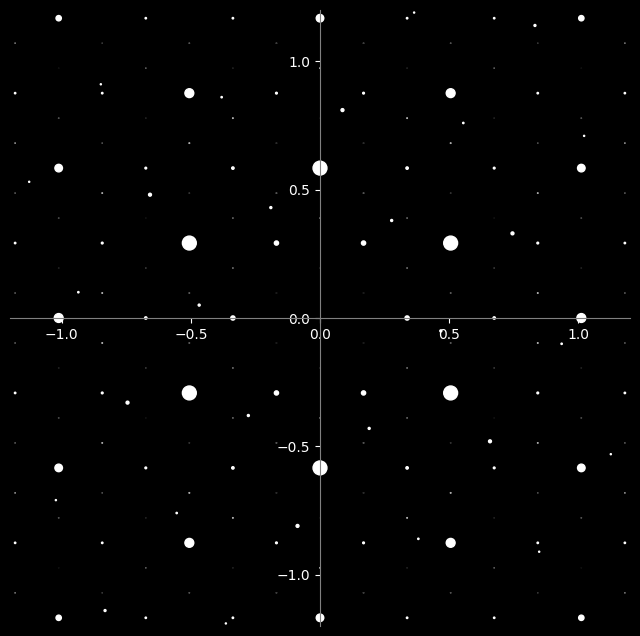

Diffraction pattern complete.


In [10]:
sOp.primitive_lattice.name="Suggested_System"
sMi.primitive_lattice.name="Minimum_System"
sOp.diffractionPattern(border=1.2,prnt=True)
sMi.diffractionPattern(border=1.2,prnt=True)

## Abbreviated Function generateSuperCell
The generateSuperCell(n, e) method from the System object automatically and consecutively executes the functions searchLP, calculateTM, and optimize_system. It generates a copy of the original system using as the primitive cell (PC) the one associated with the transformation matrix (TM) suggested by the program—specifically, the one with the lowest deformation among the smallest calculated matrices.

This function performs the search within an area defined by the parameter n, and applies a maximum deformation limit specified by e.

As an example of how to use the generateSuperCell function, we will now generate the POSCAR file corresponding to the primitive cell of the system formed by the stacking of graphene and FePS3, with a twist angle of 12.47$^\circ$, using this function.

Size of the primitive vectors: |a|=42.80432Å, |b|=42.80432Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   9   11|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  602   |
|        Graphene         |  | -11   20|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |   2    6|  |  | 1.00403 -0.00661|  |   +0.074% // +0.33°   |  520   |
|      FePS3(12.47°)      |  |  -6    8|  |  | 0.00661  0.99742|  |   +0.074% // +0.33°   |        |
|                         |               |                       |                       |        |

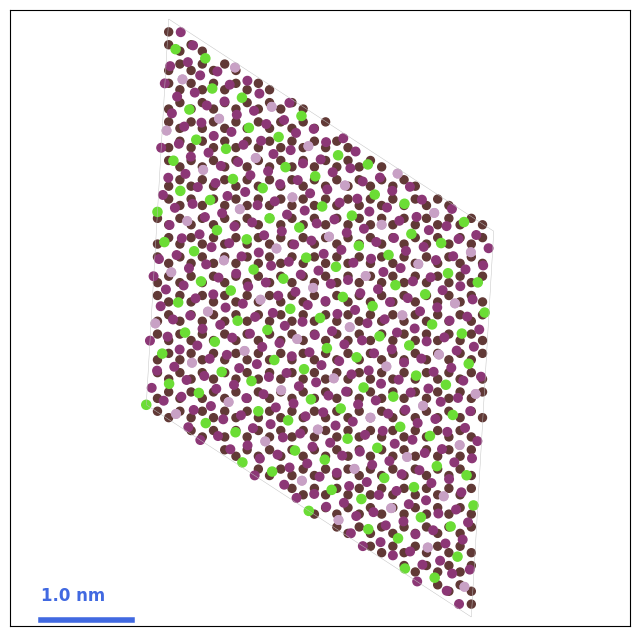

Reciprocal Space:


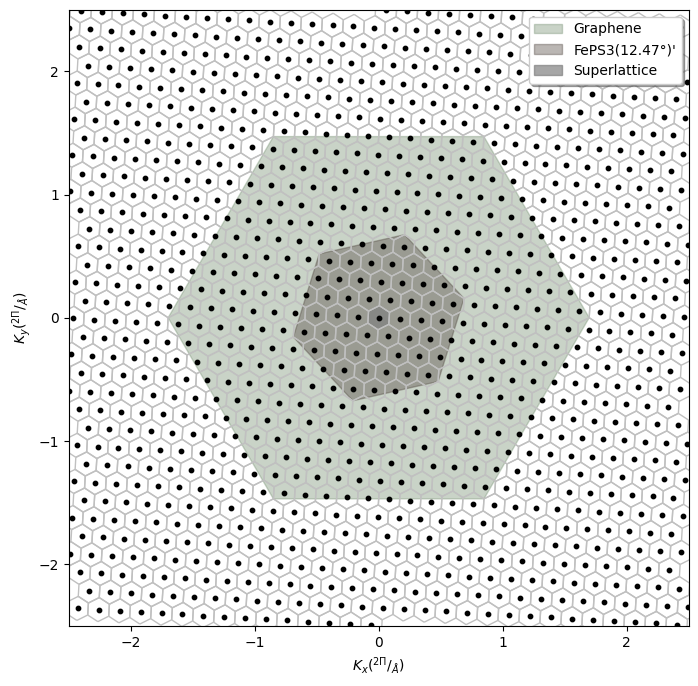

***The calculated supercell is optimized. At least one of the system layers was deformed to do so.
Lattice exported in:'C:\SS\Nook’iin\Nook-iin\Examples\English\VASP_Files/G-FePS3(12_47).vasp'


1

In [11]:
S = System([l2, l1.mRot(12.47)])
newS = S.generateSuperCell(15,0.01,showTable=True)
newS.exportPC(PCname='G-FePS3(12_47)')